In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso


In [2]:
data = pd.read_csv('processed_airbnb_data_ML.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469754 entries, 0 to 469753
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Host Since                   469754 non-null  object 
 1   Host Response Time           469754 non-null  object 
 2   Neighbourhood Cleansed       469754 non-null  object 
 3   City                         469754 non-null  object 
 4   State                        469748 non-null  object 
 5   Country                      469754 non-null  object 
 6   Property Type                469754 non-null  object 
 7   Room Type                    469754 non-null  object 
 8   Accommodates                 469754 non-null  float64
 9   Bathrooms                    469754 non-null  float64
 10  Bedrooms                     469754 non-null  float64
 11  Beds                         469754 non-null  float64
 12  Bed Type                     469754 non-null  object 
 13 

In [5]:

# Select features and target
features = [
    'Host Response Time', 'Neighbourhood Cleansed', 'City', 'State', 'Country',
    'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
    'Beds', 'Bed Type', 'Guests Included', 'Minimum Nights', 'Maximum Nights',
    'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365',
    'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
    'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication',
    'Review Scores Location', 'Review Scores Value', 'Cancellation Policy',
    'Is New Listing', 'Is there Security Deposit', 'Is there Cleaning Fee',
    'Has Notes', 'Has Amenities', 'Is Capital', 'Is Short Term',
    'Charges for Extra People', 'House Rules Length', 'House Rules Category',
    'Response Rate Category', 'Has Info about Host', 'Description Length (Chars)',
    'Description Length', 'Access Instructions'
]
target = 'Price'

# Preprocess data
categorical_features = data.select_dtypes(include=['object']).columns.intersection(features)
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.intersection(features)

# Define transformers
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Get model coefficients
if hasattr(pipeline['regressor'], 'coef_'):
    print("Feature Coefficients:")
    coeffs = pipeline['regressor'].coef_
    print(coeffs)


Mean Squared Error: 6120.79
R^2 Score: 0.73
Feature Coefficients:
[27.57766028 16.50235078 23.75555406 ...  5.08253834 -6.96678201
  1.88424372]


In [6]:
# Train model
pipeline.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Metrics for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print("Training Metrics:")
print(f"Mean Squared Error: {train_mse:.2f}")
print(f"R^2 Score: {train_r2:.2f}\n")

print("Test Metrics:")
print(f"Mean Squared Error: {test_mse:.2f}")
print(f"R^2 Score: {test_r2:.2f}\n")

# Extract and print coefficients
if hasattr(pipeline['regressor'], 'coef_'):
    # Get feature names
    feature_names = numeric_features.tolist() + list(
        pipeline.named_steps['preprocessor']
        .named_transformers_['cat']
        .get_feature_names_out(categorical_features)
    )

    coefficients = pipeline.named_steps['regressor'].coef_
    print("Feature Coefficients:")
    for feature, coef in zip(feature_names, coefficients):
        print(f"{feature}: {coef:.4f}")

# Summary
print("\nModel Summary:")
print(f"Total Features: {len(feature_names)}")
print(f"Top 5 Positive Influences: {sorted(zip(coefficients, feature_names), reverse=True)[:5]}")
print(f"Top 5 Negative Influences: {sorted(zip(coefficients, feature_names))[:5]}")

Training Metrics:
Mean Squared Error: 5947.29
R^2 Score: 0.73

Test Metrics:
Mean Squared Error: 6120.79
R^2 Score: 0.73

Feature Coefficients:
Accommodates: 27.5777
Bathrooms: 16.5024
Bedrooms: 23.7556
Beds: -6.1963
Guests Included: 4.7729
Minimum Nights: -2.0966
Maximum Nights: -0.3071
Availability 30: 6.8456
Availability 60: 3.1110
Availability 90: 1.1015
Availability 365: 4.2246
Number of Reviews: -3.8273
Review Scores Rating: 28.4466
Review Scores Accuracy: 2.0000
Review Scores Cleanliness: 12.5974
Review Scores Checkin: -1.6391
Review Scores Communication: -3.8460
Review Scores Location: 15.9168
Review Scores Value: -24.4254
Is New Listing: 35.5357
Is there Security Deposit: -4.2647
Is there Cleaning Fee: -1.5081
Has Notes: 0.1413
Has Amenities: -0.9348
Is Capital: 2.3082
Is Short Term: 0.4734
Charges for Extra People: -9.5930
House Rules Length: -0.0658
Has Info about Host: 0.5332
Description Length (Chars): 0.5045
Description Length: 1.0468
Access Instructions: -1.1944
Host Res

In [7]:
# Select features and target, excluding 'Country', 'City', and 'Neighbourhood Cleansed'
features = [
    'Host Response Time', 'Property Type', 'Room Type',
    'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
    'Guests Included', 'Minimum Nights', 'Maximum Nights',
    'Availability 30', 'Availability 60', 'Availability 90',
    'Availability 365', 'Number of Reviews', 'Review Scores Rating',
    'Review Scores Accuracy', 'Review Scores Cleanliness',
    'Review Scores Checkin', 'Review Scores Communication',
    'Review Scores Location', 'Review Scores Value',
    'Cancellation Policy', 'Is New Listing', 'Is there Security Deposit',
    'Is there Cleaning Fee', 'Has Notes', 'Has Amenities',
    'Is Capital', 'Is Short Term', 'Charges for Extra People',
    'House Rules Length', 'House Rules Category', 'Response Rate Category',
    'Has Info about Host',
    'Description Length', 'Access Instructions'
]
target = 'Price'

# Preprocess data
categorical_features = data.select_dtypes(include=['object']).columns.intersection(features)
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.intersection(features)

# Define transformers
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Metrics for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print("Training Metrics:")
print(f"Mean Squared Error: {train_mse:.2f}")
print(f"R^2 Score: {train_r2:.2f}\n")

print("Test Metrics:")
print(f"Mean Squared Error: {test_mse:.2f}")
print(f"R^2 Score: {test_r2:.2f}\n")

# Extract and print coefficients
if hasattr(pipeline['regressor'], 'coef_'):
    # Get feature names
    feature_names = numeric_features.tolist() + list(
        pipeline.named_steps['preprocessor']
        .named_transformers_['cat']
        .get_feature_names_out(categorical_features)
    )

    coefficients = pipeline.named_steps['regressor'].coef_
    print("Feature Coefficients:")
    for feature, coef in zip(feature_names, coefficients):
        print(f"{feature}: {coef:.4f}")

# Summary
print("\nModel Summary:")
print(f"Total Features: {len(feature_names)}")
print(f"Top 5 Positive Influences: {sorted(zip(coefficients, feature_names), reverse=True)[:5]}")
print(f"Top 5 Negative Influences: {sorted(zip(coefficients, feature_names))[:5]}")


Training Metrics:
Mean Squared Error: 16564.57
R^2 Score: 0.25

Test Metrics:
Mean Squared Error: 16588.89
R^2 Score: 0.26

Feature Coefficients:
Accommodates: 27.5511
Bathrooms: 10.3414
Bedrooms: 26.9073
Beds: -13.1100
Guests Included: 6.5499
Minimum Nights: -2.0002
Maximum Nights: -0.2363
Availability 30: 3.6973
Availability 60: 26.5104
Availability 90: -23.5204
Availability 365: -5.1271
Number of Reviews: -3.5658
Review Scores Rating: 52.1418
Review Scores Accuracy: -1.4096
Review Scores Cleanliness: 9.0012
Review Scores Checkin: -5.7848
Review Scores Communication: -0.1656
Review Scores Location: 52.5954
Review Scores Value: -53.8939
Is New Listing: 52.6031
Is there Security Deposit: -19.5308
Is there Cleaning Fee: 4.5443
Has Notes: -2.6914
Has Amenities: -0.5737
Is Capital: -19.5312
Is Short Term: 3.4401
Charges for Extra People: -12.1513
House Rules Length: 1.3025
Has Info about Host: 0.3068
Description Length: -2.9470
Access Instructions: 3.6177
Host Response Time_Not Specified:

In [10]:
# Drop the 'Average Review' column if it exists
if 'Average Review' in data.columns:
    data.drop(columns=['Average Review'], inplace=True)
    print("The 'Average Review' column has been deleted.")

# List of review-related columns
review_columns = [
    'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness',
    'Review Scores Checkin', 'Review Scores Communication',
    'Review Scores Location', 'Review Scores Value'
]

# Calculate min and max for each review-related column
min_max_reviews = data[review_columns].agg(['min', 'max'])

# Display the min and max for each column
print("\nMinimum and Maximum Values for Each Review-Related Column:")
print(min_max_reviews)


The 'Average Review' column has been deleted.

Minimum and Maximum Values for Each Review-Related Column:
     Review Scores Rating  Review Scores Accuracy  Review Scores Cleanliness  \
min                   0.0                     0.0                        0.0   
max                 100.0                    10.0                       10.0   

     Review Scores Checkin  Review Scores Communication  \
min                    0.0                          0.0   
max                   10.0                         10.0   

     Review Scores Location  Review Scores Value  
min                     0.0                  0.0  
max                    10.0                 10.0  


In [11]:
# Normalize 'Review Scores Rating' to the range 0-10
data['Review Scores Rating'] = data['Review Scores Rating'] / 10

# Verify the transformation
print("Updated 'Review Scores Rating' (normalized to 0-10):")
print(data['Review Scores Rating'].describe())


Updated 'Review Scores Rating' (normalized to 0-10):
count    469754.000000
mean          6.936252
std           4.108872
min           0.000000
25%           0.000000
50%           9.200000
75%           9.800000
max          10.000000
Name: Review Scores Rating, dtype: float64


In [12]:
# List of review-related columns
review_columns = [
    'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness',
    'Review Scores Checkin', 'Review Scores Communication',
    'Review Scores Location', 'Review Scores Value'
]

# Calculate the average review score for each listing
data['Average Review'] = data[review_columns].mean(axis=1)

# Verify the new column
print("Average Review (0-10) column created successfully:")
print(data[['Average Review']].describe())


Average Review (0-10) column created successfully:
       Average Review
count   469754.000000
mean         7.059951
std          4.164638
min          0.000000
25%          0.000000
50%          9.428571
75%          9.828571
max         10.000000


Price Skewness (before log): 2.890299930157411
Price Skewness (after log): 0.5043948902368507


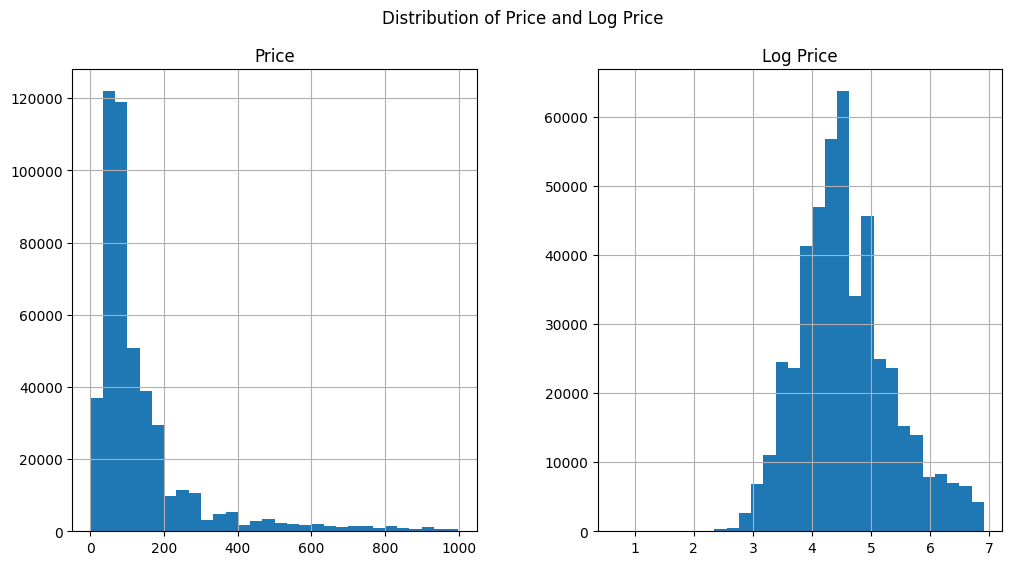

In [16]:
import numpy as np
# Check skewness of prices
print("Price Skewness (before log):", data['Price'].skew())

# Apply log transformation to the 'Price' column
data['Log Price'] = np.log1p(data['Price'])  # Use log1p to handle zero prices safely

# Check skewness after log transformation
print("Price Skewness (after log):", data['Log Price'].skew())

# Histogram to compare distributions
data[['Price', 'Log Price']].hist(bins=30, figsize=(12, 6), layout=(1, 2))
plt.suptitle("Distribution of Price and Log Price")
plt.show()

In [18]:
# Select features and target, excluding 'Country', 'City', and 'Neighbourhood Cleansed'
features = [
    'Host Response Time', 'Property Type', 'Room Type',
    'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
    'Guests Included', 'Minimum Nights', 'Maximum Nights',
    'Availability 30', 'Availability 60', 'Availability 90',
    'Availability 365', 'Number of Reviews', 'Review Scores Rating',
    'Average Review',
    'Cancellation Policy', 'Is New Listing', 'Is there Security Deposit',
    'Is there Cleaning Fee', 'Has Notes', 'Has Amenities',
    'Is Capital', 'Is Short Term', 'Charges for Extra People',
    'House Rules Length', 'House Rules Category', 'Response Rate Category',
    'Has Info about Host',
    'Description Length', 'Access Instructions'
]
target = 'Log Price'

# Preprocess data
categorical_features = data.select_dtypes(include=['object']).columns.intersection(features)
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.intersection(features)

# Define transformers
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = np.expm1(pipeline.predict(X_test))  # Reverse log1p transformation

# Metrics for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print("Training Metrics:")
print(f"Mean Squared Error: {train_mse:.2f}")
print(f"R^2 Score: {train_r2:.2f}\n")

print("Test Metrics:")
print(f"Mean Squared Error: {test_mse:.2f}")
print(f"R^2 Score: {test_r2:.2f}\n")

# Extract and print coefficients
if hasattr(pipeline['regressor'], 'coef_'):
    # Get feature names
    feature_names = numeric_features.tolist() + list(
        pipeline.named_steps['preprocessor']
        .named_transformers_['cat']
        .get_feature_names_out(categorical_features)
    )

    coefficients = pipeline.named_steps['regressor'].coef_
    print("Feature Coefficients:")
    for feature, coef in zip(feature_names, coefficients):
        print(f"{feature}: {coef:.4f}")

# Summary
print("\nModel Summary:")
print(f"Total Features: {len(feature_names)}")
print(f"Top 5 Positive Influences: {sorted(zip(coefficients, feature_names), reverse=True)[:5]}")
print(f"Top 5 Negative Influences: {sorted(zip(coefficients, feature_names))[:5]}")

Training Metrics:
Mean Squared Error: 0.38
R^2 Score: 0.40

Test Metrics:
Mean Squared Error: 15867.16
R^2 Score: -25261.83

Feature Coefficients:
Accommodates: 0.1865
Bathrooms: 0.0279
Bedrooms: 0.1303
Beds: -0.0919
Guests Included: 0.0460
Minimum Nights: -0.0162
Maximum Nights: -0.0014
Availability 30: 0.0500
Availability 60: 0.0844
Availability 90: -0.0735
Availability 365: -0.0243
Number of Reviews: -0.0094
Review Scores Rating: 0.2443
Is New Listing: 0.2838
Is there Security Deposit: -0.0473
Is there Cleaning Fee: 0.0326
Has Notes: -0.0088
Has Amenities: -0.0088
Is Capital: -0.1384
Is Short Term: 0.0123
Charges for Extra People: -0.0916
House Rules Length: 0.0063
Has Info about Host: 0.0145
Description Length: -0.0021
Access Instructions: 0.0152
Average Review: 0.0255
Host Response Time_Not Specified: 38117069690.7216
Host Response Time_a few days or more: 38117069690.6418
Host Response Time_within a day: 38117069690.3693
Host Response Time_within a few hours: 38117069690.3503
Hos

In [22]:

# Preprocess data
categorical_features = data.select_dtypes(include=['object']).columns.intersection(features)
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.intersection(features)

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define Lasso pipeline
lasso_model = Lasso(alpha=0.1, random_state=42)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lasso_model)
])

# Split data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Get feature importances (coefficients)
if hasattr(pipeline.named_steps['regressor'], 'coef_'):
    feature_names = numeric_features.tolist() + list(
        pipeline.named_steps['preprocessor']
        .named_transformers_['cat']
        .get_feature_names_out(categorical_features)
    )
    coefficients = pipeline.named_steps['regressor'].coef_

    # Combine feature names and coefficients into a DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', key=abs, ascending=False)

    # Print top features
    print("Top Features by Lasso Coefficients:")
    print(importance_df.head(10))

Top Features by Lasso Coefficients:
                        Feature  Coefficient
0                  Accommodates     0.188298
50    Room Type_Entire home/apt     0.135028
2                      Bedrooms     0.070594
18                   Is Capital    -0.034504
63  Response Rate Category_High    -0.000000
62    House Rules Category_Weak    -0.000000
36          Property Type_Cabin     0.000000
37      Property Type_Camper/RV    -0.000000
38         Property Type_Chalet    -0.000000
39    Property Type_Condominium     0.000000


<Figure size 1200x800 with 0 Axes>

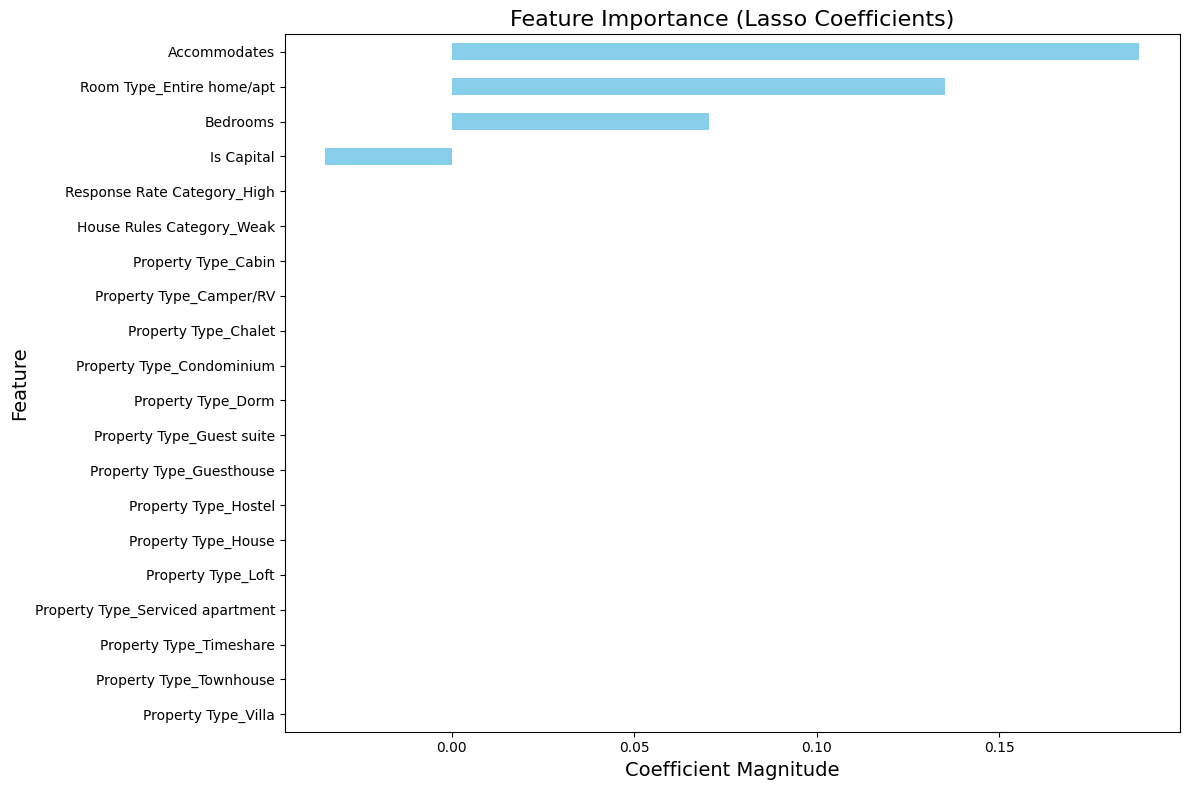

In [23]:
# Plot feature importances
plt.figure(figsize=(12, 8))
importance_df[:20].plot(
    x='Feature', y='Coefficient', kind='barh', legend=False, figsize=(12, 8), color='skyblue'
)
plt.title("Feature Importance (Lasso Coefficients)", fontsize=16)
plt.xlabel("Coefficient Magnitude", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.tight_layout()
plt.show()

In [26]:
# Select features and target, excluding 'Country', 'City', and 'Neighbourhood Cleansed'
features = [
   'Property Type', 'Country', 'City',
    'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
    'Guests Included', 'Minimum Nights', 'Maximum Nights',
    'Number of Reviews',
    'Average Review',
    'Cancellation Policy', 'Is New Listing',
    'Is there Cleaning Fee', 'Has Notes', 'Has Amenities',
    'Is Capital', 'Is Short Term', 'Charges for Extra People',
    'House Rules Length', 'House Rules Category',
    'Has Info about Host',
    'Description Length',
]
target = 'Log Price'

# Preprocess data
categorical_features = data.select_dtypes(include=['object']).columns.intersection(features)
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.intersection(features)

# Define transformers
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = np.expm1(pipeline.predict(X_test))  # Reverse log1p transformation

# Metrics for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print("Training Metrics:")
print(f"Mean Squared Error: {train_mse:.2f}")
print(f"R^2 Score: {train_r2:.2f}\n")

print("Test Metrics:")
print(f"Mean Squared Error: {test_mse:.2f}")
print(f"R^2 Score: {test_r2:.2f}\n")

# Extract and print coefficients
if hasattr(pipeline['regressor'], 'coef_'):
    # Get feature names
    feature_names = numeric_features.tolist() + list(
        pipeline.named_steps['preprocessor']
        .named_transformers_['cat']
        .get_feature_names_out(categorical_features)
    )

    coefficients = pipeline.named_steps['regressor'].coef_
    print("Feature Coefficients:")
    for feature, coef in zip(feature_names, coefficients):
        print(f"{feature}: {coef:.4f}")

# Summary
print("\nModel Summary:")
print(f"Total Features: {len(feature_names)}")
print(f"Top 5 Positive Influences: {sorted(zip(coefficients, feature_names), reverse=True)[:5]}")
print(f"Top 5 Negative Influences: {sorted(zip(coefficients, feature_names))[:5]}")

Training Metrics:
Mean Squared Error: 0.21
R^2 Score: 0.67

Test Metrics:
Mean Squared Error: 34456.31
R^2 Score: -54858.48

Feature Coefficients:
Accommodates: 0.3360
Bathrooms: 0.0274
Bedrooms: 0.1078
Beds: -0.0721
Guests Included: 0.0507
Minimum Nights: -0.0034
Maximum Nights: -0.0018
Number of Reviews: -0.0166
Is New Listing: 0.2840
Is there Cleaning Fee: 0.0354
Has Notes: -0.0047
Has Amenities: -0.0097
Is Capital: 0.0386
Is Short Term: -0.0119
Charges for Extra People: -0.1049
House Rules Length: 0.0024
Has Info about Host: 0.0106
Description Length: 0.0153
Average Review: 0.2396
City_abbotsford: 0.0441
City_acilia-castel fusano-ostia antica: -0.0028
City_agoura hills: 0.1296
City_alaró: 0.0089
City_alba-penia: -0.1007
City_albert park: 0.4347
City_alcudia: -0.1991
City_alcúdia: -0.1924
City_alexandria: 0.1554
City_algaida: 0.0371
City_alhambra: -0.2811
City_allambie heights: 0.1884
City_allston: 0.0093
City_alphington: -0.1046
City_altadena: 0.1035
City_altona: -0.0489
City_alton

In [ ]:
from sklearn.ensemble import RandomForestRegressor

features = [
   'Property Type', 'Country', 'City',
    'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
    'Guests Included', 'Minimum Nights', 'Maximum Nights',
    'Number of Reviews',
    'Average Review',
    'Cancellation Policy', 'Is New Listing',
    'Is there Cleaning Fee', 'Has Notes', 'Has Amenities',
    'Is Capital', 'Is Short Term', 'Charges for Extra People',
    'House Rules Length', 'House Rules Category',
    'Has Info about Host',
    'Description Length',
]
target = 'Log Price'

# Preprocess data
categorical_features = data.select_dtypes(include=['object']).columns.intersection(features)
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.intersection(features)

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Split data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
X_train_preprocessed = preprocessor.fit_transform(X_train)
rf_model.fit(X_train_preprocessed, y_train)

# Get feature names after preprocessing
feature_names = numeric_features.tolist() + list(
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
)

# Feature importances
importances = rf_model.feature_importances_

# Combine feature names and importances into a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top features
print("Top Features by Random Forest Importance:")
print(importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(12, 8))
importance_df[:20].plot(
    x='Feature', y='Importance', kind='barh', legend=False, figsize=(12, 8), color='skyblue'
)
plt.title("Feature Importance (Random Forest)", fontsize=16)
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.tight_layout()
plt.show()